In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from datetime import datetime
from langchain_core.tools import tool


@tool
def get_current_time():
    """Use this to get current date or time"""
    return datetime.now()

In [3]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

In [7]:
from langgraph.checkpoint.memory import MemorySaver

# 메모리 저장소 생성
memory = MemorySaver()

In [8]:

from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate, ChatPromptTemplate
from langgraph.prebuilt import create_react_agent

tools = [get_current_time]
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
llm = llm.bind_tools(tools)

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. Answer in Korean.",
        ),
        ("human", "{messages}"),
    ]
)


graph = create_react_agent(llm, tools, state_modifier=prompt, checkpointer=memory)

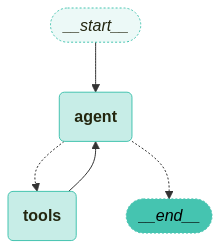

In [5]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(graph, xray=True)

In [10]:
from langchain_core.messages import HumanMessage

question = "한국의 수도는?"
inputs = {"messages": [("user", question)], }
from langchain_core.runnables import RunnableConfig

config = RunnableConfig(
    recursion_limit=10,  # 최대 10개의 노드까지 방문. 그 이상은 RecursionError 발생
    configurable={"thread_id": "1"},  # 스레드 ID 설정
)

for chunk_msg, metadata  in graph.stream(inputs, stream_mode="messages", config=config):
    if (
            chunk_msg.content
            and not isinstance(chunk_msg, HumanMessage)
            and metadata["langgraph_node"] == "agent"
    ):
        print(chunk_msg.content, end="", flush=True)

한국의 수도는 서울입니다.

In [11]:
question = "그럼 일본은?"
inputs = {"messages": [("user", question)], }
from langchain_core.runnables import RunnableConfig

config = RunnableConfig(
    recursion_limit=10,  # 최대 10개의 노드까지 방문. 그 이상은 RecursionError 발생
    configurable={"thread_id": "1"},  # 스레드 ID 설정
)

for chunk_msg, metadata  in graph.stream(inputs, stream_mode="messages", config=config):
    if (
            chunk_msg.content
            and not isinstance(chunk_msg, HumanMessage)
            and metadata["langgraph_node"] == "agent"
    ):
        print(chunk_msg.content, end="", flush=True)

일본의 수도는 도쿄입니다.

In [12]:
from langchain_core.runnables import RunnableConfig

config = RunnableConfig(
    configurable={"thread_id": "1"},  # 스레드 ID 설정
)
# 그래프 상태 스냅샷 생성
snapshot = graph.get_state(config)
snapshot.values["messages"]

[HumanMessage(content='한국의 수도는?', additional_kwargs={}, response_metadata={}, id='2b16ce1a-242d-428b-9a12-883248fdf198'),
 AIMessage(content='한국의 수도는 서울입니다.', additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_44added55e'}, id='run-b1930cf6-58b2-4ed9-9913-ab9447977f95'),
 HumanMessage(content='그럼 일본은?', additional_kwargs={}, response_metadata={}, id='7b6ee1c9-5d14-42f6-be16-ff00edcb845a'),
 AIMessage(content='일본의 수도는 도쿄입니다.', additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_44added55e'}, id='run-6c19b70d-d467-48d6-97b3-0db90220e1d6')]

In [13]:
from langchain_core.messages import HumanMessage

question = "현재 날짜는?"
inputs = {"messages": [("user", question)], }
from langchain_core.runnables import RunnableConfig

config = RunnableConfig(
    recursion_limit=10,  # 최대 10개의 노드까지 방문. 그 이상은 RecursionError 발생
    configurable={"thread_id": "2"},  # 스레드 ID 설정
)

for chunk_msg, metadata  in graph.stream(inputs, stream_mode="messages", config=config):
    if (
            chunk_msg.content
            and not isinstance(chunk_msg, HumanMessage)
            and metadata["langgraph_node"] == "agent"
    ):
        print(chunk_msg.content, end="", flush=True)

현재 날짜는 2025년 4월 14일입니다.

In [14]:
from langchain_core.messages import HumanMessage

question = "그럼 어제는?"
inputs = {"messages": [("user", question)], }
from langchain_core.runnables import RunnableConfig

config = RunnableConfig(
    recursion_limit=10,  # 최대 10개의 노드까지 방문. 그 이상은 RecursionError 발생
    configurable={"thread_id": "2"},  # 스레드 ID 설정
)

for chunk_msg, metadata  in graph.stream(inputs, stream_mode="messages", config=config):
    if (
            chunk_msg.content
            and not isinstance(chunk_msg, HumanMessage)
            and metadata["langgraph_node"] == "agent"
    ):
        print(chunk_msg.content, end="", flush=True)

어제는 2025년 4월 13일입니다.

In [15]:
config = RunnableConfig(
    configurable={"thread_id": "2"},  # 스레드 ID 설정
)
# 그래프 상태 스냅샷 생성
snapshot = graph.get_state(config)
snapshot.values["messages"]

[HumanMessage(content='현재 날짜는?', additional_kwargs={}, response_metadata={}, id='ce307f00-7abe-4f8e-8b71-3fd554425b4b'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_SCJac6G1o9TZz4e9dz1KVPyA', 'function': {'arguments': '{}', 'name': 'get_current_time'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_44added55e'}, id='run-018f4efe-f67e-4f2c-8ac9-9873831f8c01', tool_calls=[{'name': 'get_current_time', 'args': {}, 'id': 'call_SCJac6G1o9TZz4e9dz1KVPyA', 'type': 'tool_call'}]),
 ToolMessage(content='2025-04-14 17:50:42.272348', name='get_current_time', id='23446526-e6db-4cbf-9dc0-6c755eec0329', tool_call_id='call_SCJac6G1o9TZz4e9dz1KVPyA'),
 AIMessage(content='현재 날짜는 2025년 4월 14일입니다.', additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_44added55e'}, id='run-1e598dc7-8ed3-49e9-b896-3d4

In [30]:
from langchain_core.messages import HumanMessage

question = "지금 몇일이야?"
inputs = {"messages": [("user", question)]}
for chunk_msg, metadata  in graph.stream(inputs, stream_mode="messages"):
    if (
            chunk_msg.content
            and not isinstance(chunk_msg, HumanMessage)
            and metadata["langgraph_node"] == "agent"
    ):
        print(chunk_msg.content, end="", flush=True)

오늘은 2025년 4월 13일입니다.